<a href="https://colab.research.google.com/github/markcastor/Support-Vector-Machine/blob/main/Support_Vector_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple support vector machine

lets generate some data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def clouds(num_points=100):
  centers = [(1, 1), (-1, -1)]
  spreads = [0.5, 0.7]
  labels = [-1, 1]

  X = []
  y = []

  for center, spread, label in zip(centers, spreads, labels):
      X += np.random.multivariate_normal(
          center, spread * np.identity(2), num_points
      ).tolist()
      y += [label] * num_points

  return X, y

The function above will generate synthetic data for two classification problems
We have 2 clusterpoints in the data cluster (1,1) and cluster (-1,1)
Now for the spread controlled by the spread list ,
lables of points in each clusters are controled by labels.

The num_point argument determines the number of points in each cluster

Plotting the generated data


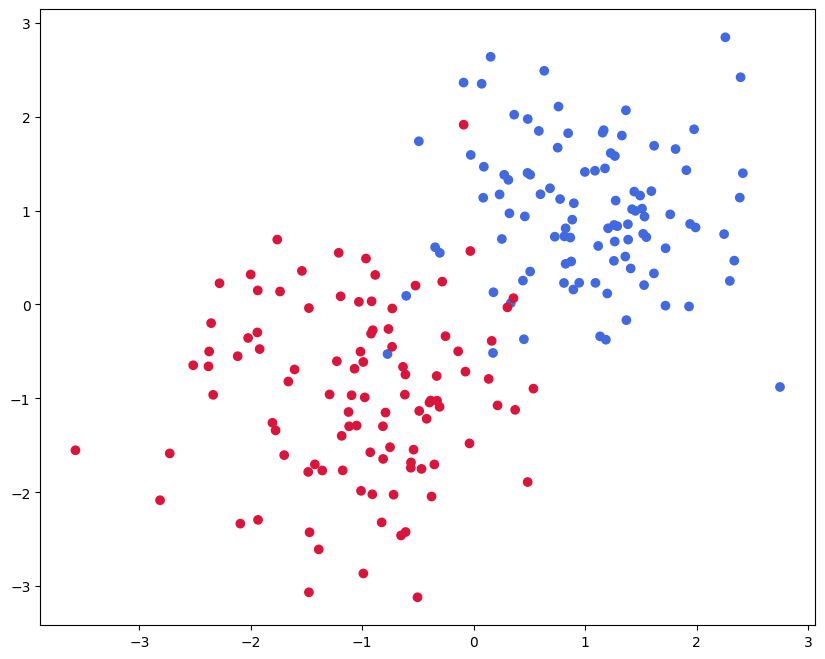

In [2]:
X, y = clouds()
colors = ["crimson" if label == 1 else "royalblue" for label in y]
plt.figure(figsize=(10, 8))
plt.scatter(np.array(X)[:, 0], np.array(X)[:, 1], c=colors)
plt.show()


Defining the loss function

We include the constraint we need to classify the data correctly as penalty with weigt
the larger , the more important it is to classify the data correctly.


In [3]:
def loss(support_vector, X, y, penalty=1e5):
  w = support_vector[1:]
  b = support_vector[0]

  norm = np.linalg.norm(w) ** 2
  constraint = sum(max(0, 1 - y[i] * (w.dot(X[i]) - b)) for i, _ in enumerate(y))

  return norm + penalty * constraint

The function above will define a loss function for the support vector machines, which will be used to train the model by minimizing the value of the loss func in respect to the models parameters

The Penalty is a scalar value that controls thhe trade off between the margin maximization and the misclassification error.

The function uses the variables w, b, norm and constraints to calculate the loss , which then calculates the value of the regularization term which is defined as the norm of the weight vector., which will calculate the hinge loss which measures the misclassification error. Finally, the function returns the sum of the regularization term and the hinge loss.

Minimizing Loss

In [4]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.9 MB/s eta 0:00:00


In [5]:
from qiskit.algorithms.optimizers import L_BFGS_B

optimizer = L_BFGS_B()
result = optimizer.minimize(lambda sv: loss(sv, X, y), x0=np.random.random(3))
support_vector = result.x

<ipython-input-5-4fc739173aba>:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import L_BFGS_B


THE l_bfgs_b optimizer is an optimization algorithm for large-scale bound connstrained problems to minimize the loss function defined above by loss()

 The created instance of the optimizer uses Minimize() to minimize the loss function the method returns the loss and the initial geus for the support vector as inputs.
  

In [6]:
def classify(point, support_vector):
  w = support_vector[1:]
  b = support_vector[0]

  return np.sign(w.dot(point) + b)

This func is a siple Binary classiffier that uses a trained support vector machine to classify a new point.uses the variables w and b, which are extracted from the support_vector input, to calculate the dot product of w and point,it adds the bias term b to the dot product and applies the sign function to the result, which returns 1 or -1

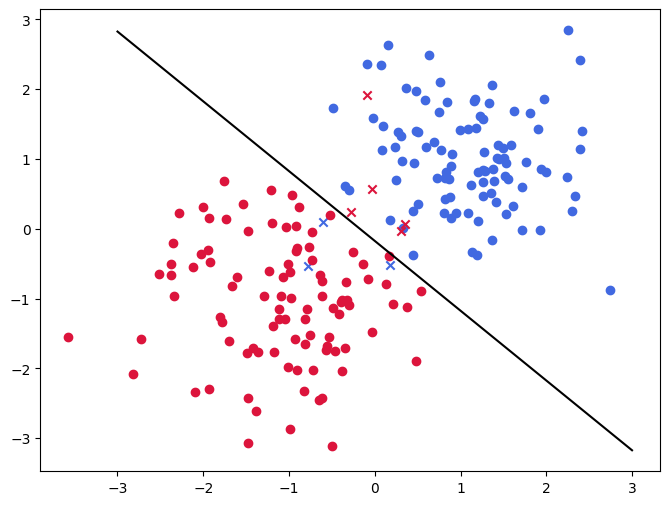

In [7]:
predicted = [classify(point, support_vector) for point in X]
colors = ["crimson" if label == 1 else "royalblue" for label in y]
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(y, predicted)
]

plt.figure(figsize=(8, 6))
for point, marker, color in zip(X, markers, colors):
    plt.scatter(point[0], point[1], color=color, marker=marker)

b, w = support_vector[0], support_vector[1:]
x1 = np.linspace(-3, 3, num=100)
x2 = -1 / w[1] * (w[1] * x1 + b)
plt.plot(x1, x2, "k-")
plt.show()

This will use both the classify() and support_vector to classify all the data-points int the dataset X.Then, it plots the decision boundary of the classifier using the equation w[0]*x1 + w[1]*x2 + b = 0 and the obtained support vector

Implementation using Sklearn

In [9]:
from sklearn.svm import SVC

model = SVC()
model.fit(X, y)

sk_predict = model.predict(X)

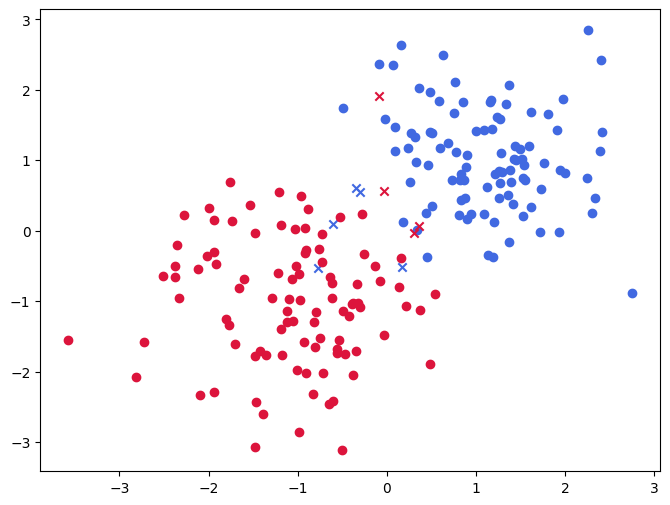

In [10]:
colors = ["crimson" if label == 1 else "royalblue" for label in y]
markers = [
    "o" if label == predicted_label else "x"
    for label, predicted_label in zip(y, sk_predict)
]


plt.figure(figsize=(8, 6))
for point, marker, color in zip(X, markers, colors):
    plt.scatter(point[0], point[1], color=color, marker=marker)
plt.show()

####Using Non-linear data

Lets generate some synthetic data

In [16]:
def circle(num_points=250):
  points = 1 - 2 * np.random.random((num_points, 2))
  radius = 0.6
  labels = [1 if np.linalg.norm(point) > radius else -1 for point in points]
  return points, labels

This function Generates a synthetic dataset of points that are randomly distributed in a circle.The radius of the circle is set to 0.6, it creates a list labels of size num_points that holds the labels for each point in the dataset.

Text(0, 0.5, '$x_2$')

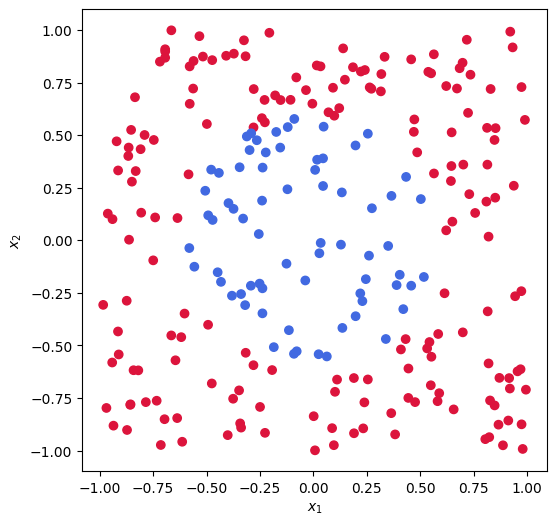

In [20]:
points, labels = circle()
colors = ["crimson" if label == 1 else "royalblue" for label in labels]

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], color=colors)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


This will create an instance of the synthetic data using circle() function, then using matplotlib library, it's creating a scatter plot of the points in the dataset

In order to solve this non-linear data problem the idea is to Embed data in a higher dimensional space then maybe its linearly seperable


###Kernel Trick


In [22]:
def feature_map(x):
  return np.array([x[0], x[1], x[0] ** 2 + x[1] ** 2])

This is a feature map function which transforms a 2D feature vector into a 3D feature vector.

It takes an input x, a 2D feature vector and applies a transformation to it, and it returns a new feature vector, which is a 3D array

This feature map function is useful for non-linear classification problem, it creates non-linear decision boundary by adding new features to the input data, in this case it's adding distance to the origin feature, which is useful for classification in a circular region

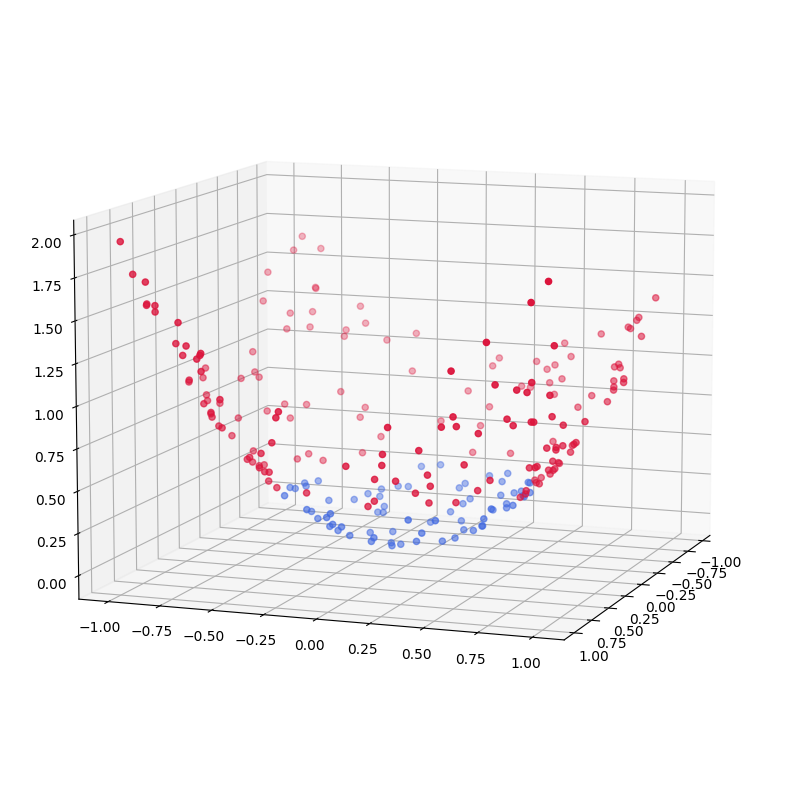

In [24]:
embeded_points = np.array([feature_map(point) for point in points])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(embeded_points[:, 0], embeded_points[:, 1], embeded_points[:, 2], color=colors)
ax.view_init(10, 20)

 This is applying the feature_map() function to each point in the dataset, it takes the 2D points, and applies the feature_map() to get the 3D points (embedded_points) .Then we create a 3D scatter plot of points,  By applying the feature_map function, it maps the data points to a higher dimensional space, where it becomes linearly separable,

In [32]:


import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=embeded_points[:, 0],
    y=embeded_points[:, 1],
    z=embeded_points[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,
        line=dict(
            width=3,
            color='DarkSlateGray'
        )
    )
))

fig.show()


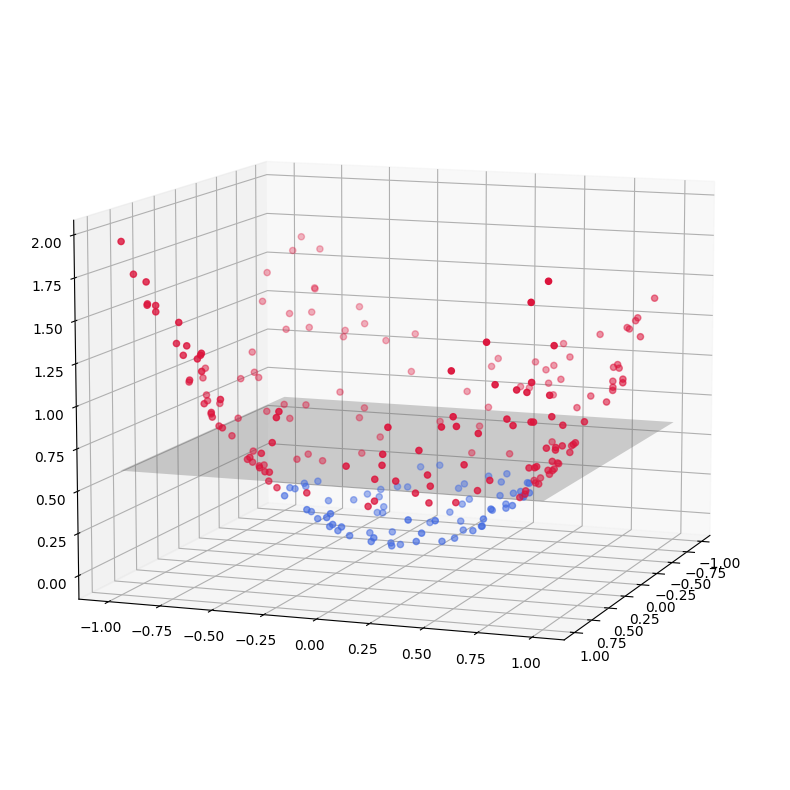

In [33]:
embeded_points = np.array([feature_map(point) for point in points])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(embeded_points[:, 0], embeded_points[:, 1], embeded_points[:, 2], color=colors)

x, y =np.meshgrid([1, -1], [1, -1])
ax.plot_surface(x, y, 0.6 * np.ones_like(x), alpha=0.3, color="grey")

ax.view_init(10, 20)

 This creates a 3D surface plot that shows the decision boundary of the classifier, it uses numpy function meshgrid to create x and y coordinates and then it uses plot_surface function from Axes3D class to plot the surface. The surface is centered at 0.6 in the z-axis and it's shown as a grey plane with alpha of 0.3 which acts as a decision boundary

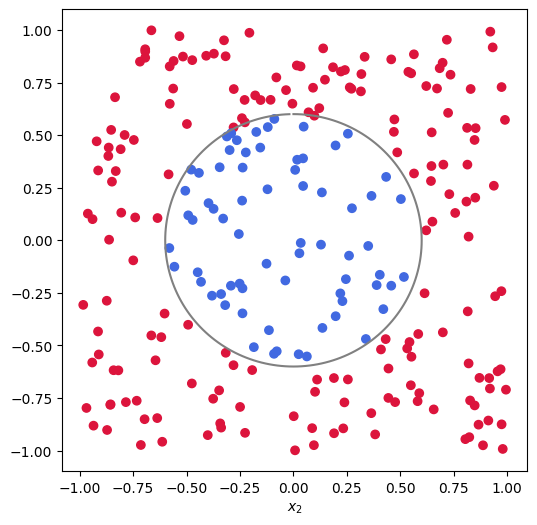

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], color=colors)

angles = np.linspace(0, 2 * np.pi, num=200, endpoint=False)
x = 0.6 * np.sin(angles)
y = 0.6 * np.cos(angles)
plt.plot(x, y, color="grey")

plt.xlabel("$x_1$")
plt.xlabel("$x_2$")
plt.show()



This creates a plot of a circle with radius 0.6 in order to visually represent the decision boundary